In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Methods and Model Validation

## Linearly Seperable Data

The shape of your data can tell you a lot about what methods might be useful to classify your data best. Linearly seperable data can be made with the `make_blobs` function. It can also generate data that cannot be seperated. The main control for this is `cluster_std`, which you should adjust.

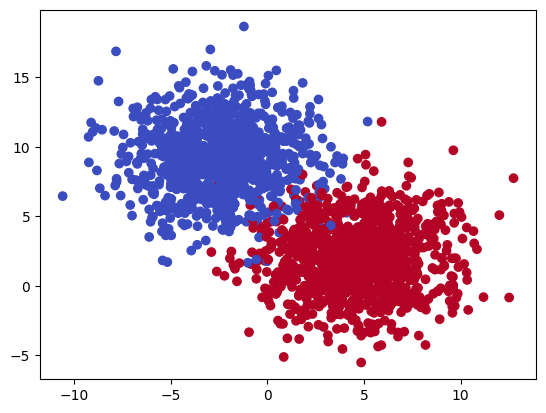

In [2]:
# Generate a linearly separable dataset
X, y = make_blobs(n_samples=2000, n_features=2, centers=2, cluster_std=2.5, center_box=(-10.0, 10.0), random_state=42)

# Plot the dataset and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

### Building a fit and determining the accuracy of the seperation (traditional methods)

The `scikit-learn` library provides us with tools to do separate these data and to evaluate their fit. Notice below that we do not perform a `train_test_split`. This is to demonstrate that you can fit all of your data if you like, that is the common statistical way of doing analysis. However, you can instead write that does the same but is evaluated with held out data.

In [3]:
# Initialize and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

# Get the coefficients and intercept of the logistic regression model
coefficients = logistic_regression.coef_
intercept = logistic_regression.intercept_

# Get the accuracy of the logistic regression model on the training set
accuracy = logistic_regression.score(X, y)

# Print the summary
print("Logistic Regression Model Summary:")
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Accuracy:", accuracy)

Logistic Regression Model Summary:
Coefficients: [[ 1.2008757  -1.25038649]]
Intercept: [5.65339035]
Accuracy: 0.9805


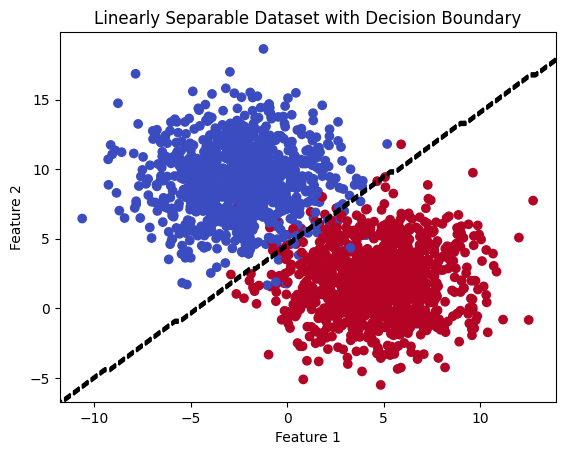

In [4]:
# Plot the dataset and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = logistic_regression.predict(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='black', linestyles='dashed')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset with Decision Boundary')
plt.show()

### Machine Learning Approach

Below we split our data to evaluate the performance of our model on data it has not seen.

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_regression.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[209   7]
 [  4 180]]


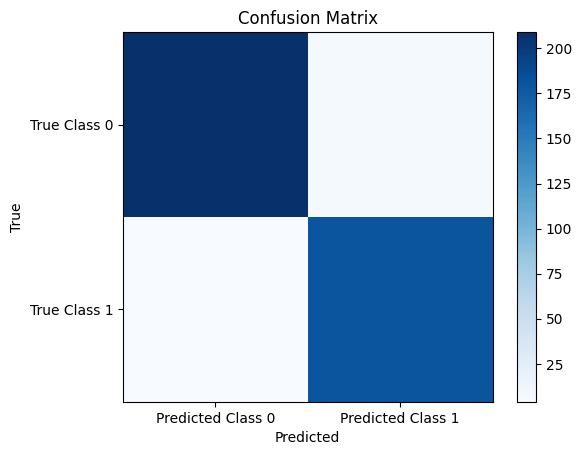

In [6]:
# Plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Class 0', 'Predicted Class 1'])
plt.yticks([0, 1], ['True Class 0', 'True Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

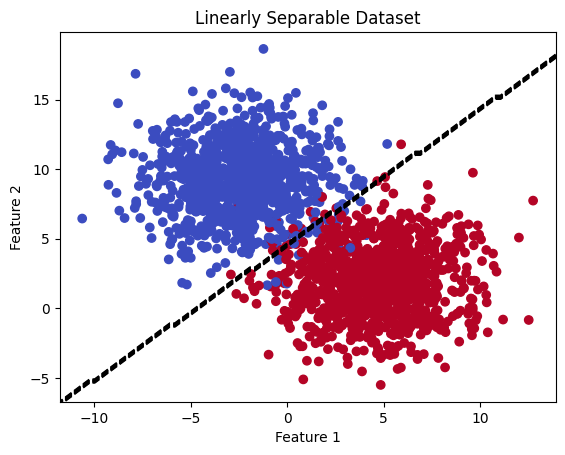

In [7]:
# Plot the dataset and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = logistic_regression.predict(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, colors='black', linestyles='dashed')


plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.show()

### Things to try
* Change the method from logisitic to something else (e.g., `KNN`). How does the classifier perform?
* Can you make a data set where logistic regression fails entirely? Does another method work better?
* The machine learning approach is stochastic (statistical in that it randomly chooses data), can you run this a few hundred times to get error bars on the predicted accurary?
* What about the other metrics (TPN, FPN, AUC)? Look these up.

## Not linearly seperable data

Below is some different data that is not easily separable linearly, but still seems like we can see some differences.

(-5.934779633069666, 3.9544192208055775)

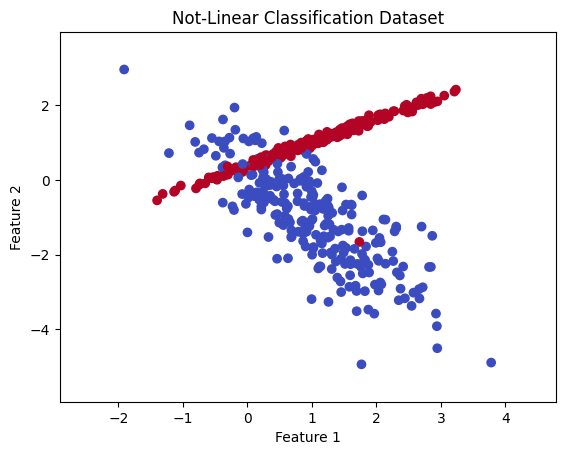

In [8]:
# Generate a notlinearly separable dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0,
                                         n_clusters_per_class=1, random_state=42)

# Plot the linear dataset and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Not-Linear Classification Dataset')
plt.xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
plt.ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)

### Let's try a linear classifier

Let's use logistic regression.

In [9]:
# Split the dataset into training and testing sets
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size=0.2,
                                                                                random_state=42)

# Initialize and fit the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_linear, y_train_linear)

LogisticRegression()

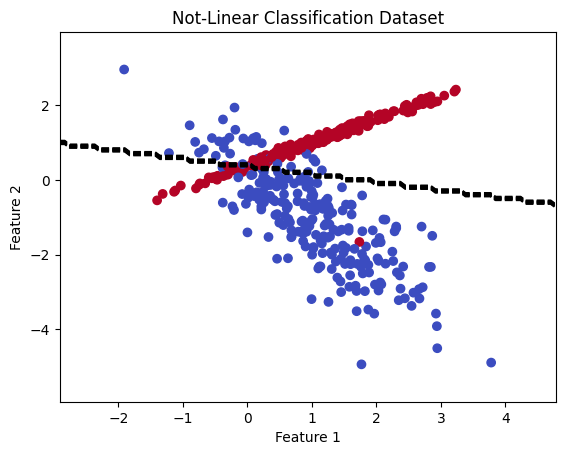

In [10]:
# Plot the linear dataset and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Not-Linear Classification Dataset')
plt.xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
plt.ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)

# Plot the decision boundary of the logistic regression model
x_values = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 100)
y_values = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, 100)
xx, yy = np.meshgrid(x_values, y_values)
Z = lr_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linestyles='dashed')
plt.show()

In [11]:
# Split the dataset into training and testing sets
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(X, y,
                                                                                            test_size=0.2,
                                                                                            random_state=42)

# Initialize and fit the SVM model with radial kernel
svm_model = SVC()
svm_model.fit(X_train_nonlinear, y_train_nonlinear)

SVC()

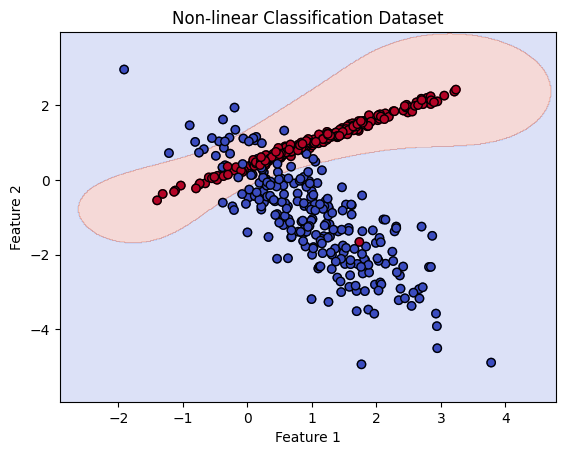

In [12]:
# Plot the non-linear dataset and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linear Classification Dataset')
plt.xlim(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1)
plt.ylim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 500),
                     np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, 500))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary of the SVM model
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.show()

### Things to try
* How do these confusion matrices compare?
* Can you get another method to work any better?
* What about the other metrics (TPN, FPN, AUC)? Look these up.